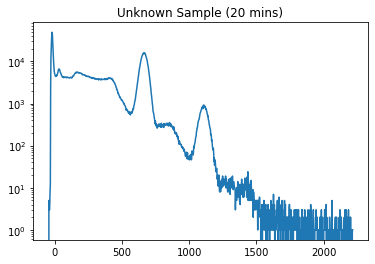

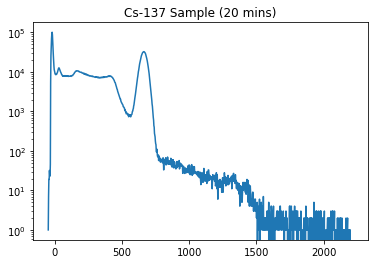

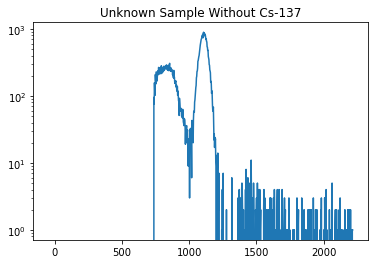

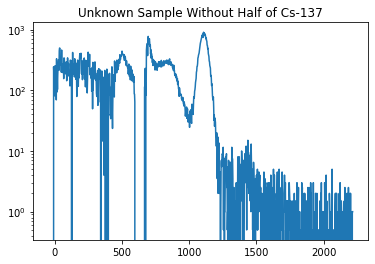

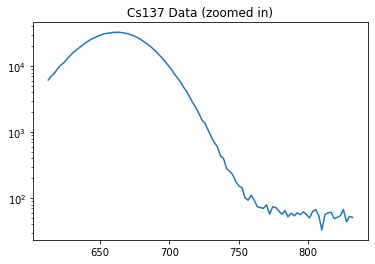

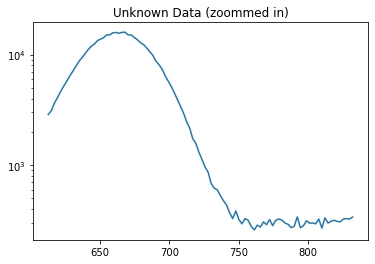

Average of (Cs137 / Unknown): 1.8993038265792692
Average of (Unknown / Cs137): 0.549181179230952


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  6 16:01:08 2021

@author: tylerpruitt
"""

# Load the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels = ("Channel", "Energy", "Counts")
UnknownData = pd.read_csv("UnknownData.csv", names=labels, sep=",", skiprows=tuple(range(26)))

Cs137Data = pd.read_csv("Cs-137Data.csv", names=labels, sep=",", skiprows=tuple(range(24)))

unknownDataArray = np.array(UnknownData)
Cs137DataArray = np.array(Cs137Data)

for i in range(1,1025):
    for j in range(3):
        unknownDataArray[i,j] = float(unknownDataArray[i,j])
        Cs137DataArray[i,j] = float(Cs137DataArray[i,j])

plt.figure(1)
plt.semilogy(unknownDataArray[1:,1], unknownDataArray[1:,2])
plt.title("Unknown Sample (20 mins)")
plt.savefig("Unknown.png")
plt.show()

plt.figure(2)
plt.semilogy(Cs137DataArray[1:,1], Cs137DataArray[1:,2])
plt.title("Cs-137 Sample (20 mins)")
plt.savefig("Cs137.png")
plt.show()

unknownRemainingCount = unknownDataArray[1:,2] - Cs137DataArray[1:,2]

plt.figure(3)
plt.semilogy(unknownDataArray[1:,1], unknownRemainingCount)
plt.title("Unknown Sample Without Cs-137")
plt.savefig("Unknown without Cs137.png")
plt.show()

dividedByTwo = unknownDataArray[1:,2] - (Cs137DataArray[1:,2] / 2.0)

plt.figure(4)
plt.semilogy(unknownDataArray[1:,1], dividedByTwo)
plt.title("Unknown Sample Without Half of Cs-137")
plt.savefig("Unknown without half of Cs137.png")
plt.show()

plt.figure(5)
plt.semilogy(Cs137DataArray[300:400,1], Cs137DataArray[300:400,2])
plt.title("Cs137 Data (zoomed in)")
plt.savefig("Cs137 Data (zoomed in)")
plt.show()

plt.figure(6)
plt.semilogy(unknownDataArray[300:400,1], unknownDataArray[300:400,2])
plt.title("Unknown Data (zoommed in)")
plt.savefig("Unknown Data (zoomed in)")
plt.show()

count = 0
csOverUnknown, unknownOverCs = 0, 0

# Find where the energy level is 725 keV
index = 0

for i in range(1, len(unknownDataArray[1:,1])):
    if (unknownDataArray[i,1] >= 725 - 1.5) and (unknownDataArray[i,1] <= 725 + 1.5):
        index = i

for i in range(1, index+1):
    if (unknownDataArray[i,2] != 0) and (Cs137DataArray[i,2] != 0):
        csOverUnknown += (Cs137DataArray[i,2] / unknownDataArray[i,2])
        unknownOverCs += (unknownDataArray[i,2] / Cs137DataArray[i,2])
        count += 1

csOverUnknown /= count
unknownOverCs /= count

print("Average of (Cs137 / Unknown):", csOverUnknown)
print("Average of (Unknown / Cs137):", unknownOverCs)

